In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, skewnorm, norm
from scipy import stats
import scipy
%matplotlib inline

In [2]:
#adding a seed for reproducibility 
np.random.seed(0)
loc, scale = 5, 2

#np.random.normal(mean, std, n)
norm_pdf = np.random.normal(loc=loc, scale=scale, size=300)

In [3]:
type(norm_pdf)

numpy.ndarray

In [4]:
#you need to specify the mean and std to compute the cdf
norm_cdf = scipy.stats.norm.cdf(norm_pdf, loc=loc, scale=scale)

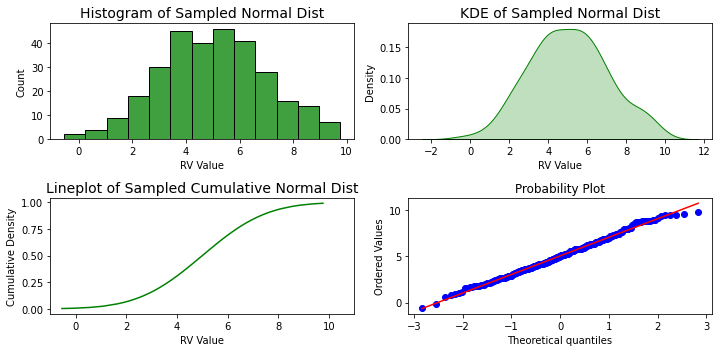

In [5]:
#playing around with setting axs correctly
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

#plot a histogram
sns.histplot(data=norm_pdf, ax=axs[0,0], color='Green')
axs[0,0].set_title('Histogram of Sampled Normal Dist', fontsize=14)
axs[0,0].set_xlabel(xlabel='RV Value')

#plot a kde
sns.kdeplot(data=norm_pdf, ax=axs[0,1], color='Green', shade=True)

axs[0,1].set_title('KDE of Sampled Normal Dist', fontsize=14)
axs[0,1].set_xlabel(xlabel='RV Value')
axs[0,1].set_ylabel(ylabel='Density')

# plot the cdf
sns.lineplot(x=norm_pdf, y=norm_cdf, ax=axs[1,0], color='Green')
axs[1,0].set_title('Lineplot of Sampled Cumulative Normal Dist', fontsize=14)
axs[1,0].set_xlabel(xlabel='RV Value')
axs[1,0].set_ylabel(ylabel='Cumulative Density')
axs[1,0].set_xlim(-1, 11)


#plot probplot
res = stats.probplot(norm_pdf, plot=axs[1,1])

#fix padding of the axs
f.tight_layout()

If you were only given the empirical distribution, you would be able to quite easily see that the mean is ~5 from the KDE/Histogram, and from the QQ-Plot you would know that the distribution is approximately normal.

You might be able to tell from the prob density plot that the std is 2, but if not you can get those values using functions

In [6]:
norm_pdf.mean()

5.055059150481773

In [7]:
norm_pdf.std()

2.001402626700238

In [8]:
#note: np does not allow you to calculate the skewness/kurtosis - you can use scipy.stats or pandas
skew(norm_pdf)

0.07914380206969182

In [9]:
kurtosis(norm_pdf)

-0.3293552229821386

<AxesSubplot:ylabel='Density'>

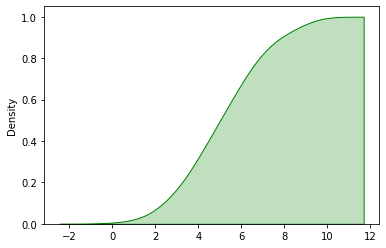

In [10]:
#can actually just plot the cdf by passing in the correct pararmeter into a kde plot!
sns.kdeplot(data=norm_pdf, color='Green', shade=True, cumulative=True)

<AxesSubplot:ylabel='Proportion'>

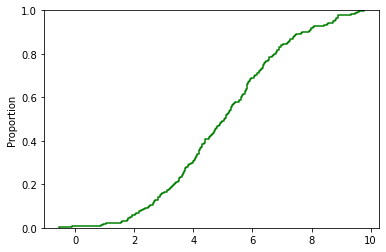

In [11]:
#there's another way to plot an empirical cdf... using ecdf of seaborn
#this does not use kernel density estimation - so this is a more realistic/jagged graph of our data
sns.ecdfplot(data=norm_pdf, color='Green')

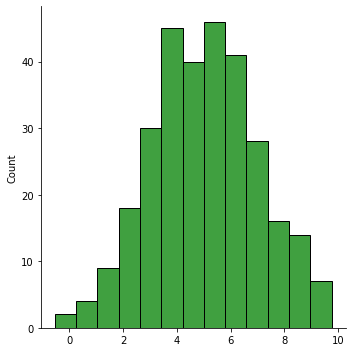

In [12]:
#comparing visual of a histplot to a distplot
sns.displot(data=norm_pdf, color='Green')

In [13]:
#standard normal var (i.e. mean=0, std=1)
x = np.random.binomial(n=30, p=.4, size=500)
y = np.random.weibull(3, size=500)

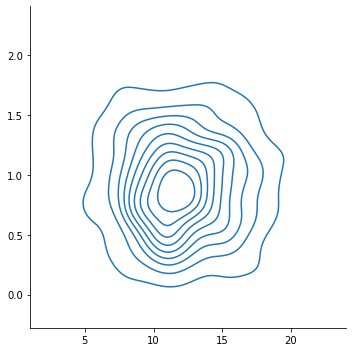

In [14]:
sns.displot(x=x, y=y, kind='kde')

In [15]:
#let's create a RV with positive skew then transform it!
skew_pdf = skewnorm.rvs(a=10, size=1000)
type(skew_pdf)

numpy.ndarray

<AxesSubplot:ylabel='Density'>

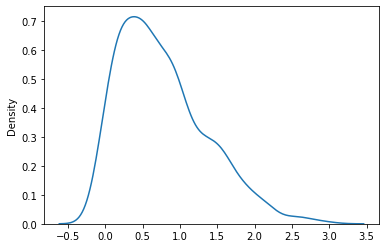

In [16]:
#what does this empirical distribution look like?
sns.kdeplot(data=skew_pdf)

In [17]:
#lets look at some colors and choose one that looks nice! I like the ice blue
sns.color_palette("pastel")
ice_blue = sns.color_palette("pastel")[-1]

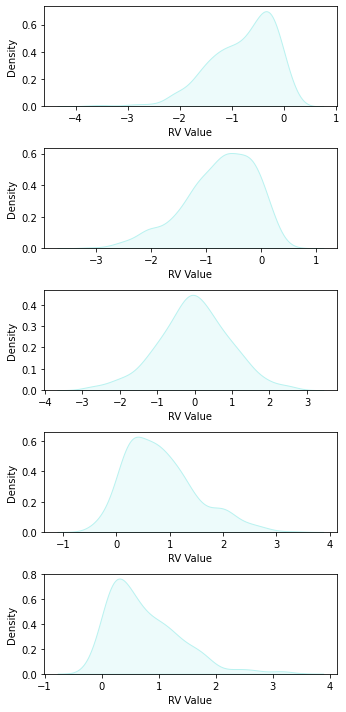

In [18]:
#what if we start at negative skew, then go to positive skew and see how the visual changes?
f, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 10))
skew_vals = [-8, -4, 0, 4, 8]

for i, v in enumerate(skew_vals):
    data = skewnorm.rvs(a=v, size=500)
    sns.kdeplot(data=data, ax=axs[i], shade=True, color=ice_blue)
    axs[i].set_xlabel(xlabel='RV Value')

f.tight_layout()

### Difference between Positive and Negative Skew

Awesome, now we know what "Negative" and "Positive" Skew look like... Negative skew has a long tail for smaller values, Positive skew has a long tail for larger values

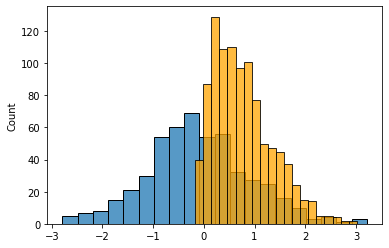

In [30]:
#lets create a histogram of a standard normal prob dist
data = np.random.randn(500)
sns.histplot(data)

#let's work with that first skewnorm distribution we created
sns.histplot(skew_pdf, kde=False, color='Orange')

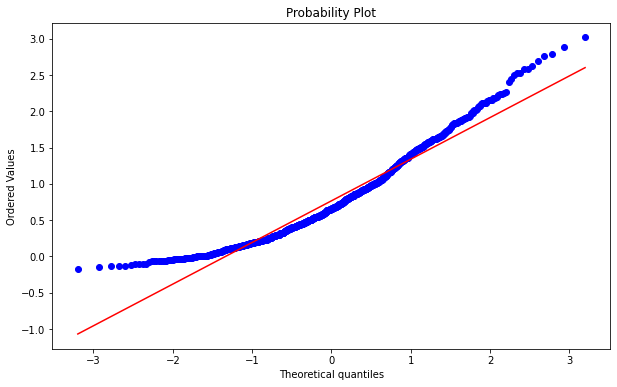

In [32]:
#our data does not look normal... is there another way to show this? Yes, QQ-plot!
f, ax = plt.subplots(figsize=(10,6))
res = stats.probplot(skew_pdf, plot=ax)

In [33]:
#this data most definitely does not follow the normal distribution, so what can we do now?
log_skew = np.log(skew_pdf)

<ipython-input-33-584f83d31bf9>:2: RuntimeWarning: invalid value encountered in log
  log_skew = np.log(skew_pdf)


In [34]:
#what does this warning mean!?
np.log(0)

<ipython-input-34-db1c23abe813>:2: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [35]:
np.log(-2)

<ipython-input-35-e78e5230d07a>:1: RuntimeWarning: invalid value encountered in log
  np.log(-2)


nan

In [36]:
#well, we can see from the histogram that our data has values that are <= 0
#and the log does not exist for that range of values!
shifted_skew = skew_pdf + 1 -  skew_pdf.min()

In [37]:
#hey look at that, no errors!
log_shift_skew = np.log(shifted_skew)

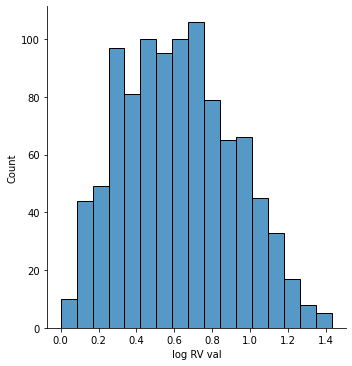

In [41]:
#we just shifted then transformed the data... what does it look like now?
ax = sns.displot(log_shift_skew)
ax.set(xlabel='log RV val')

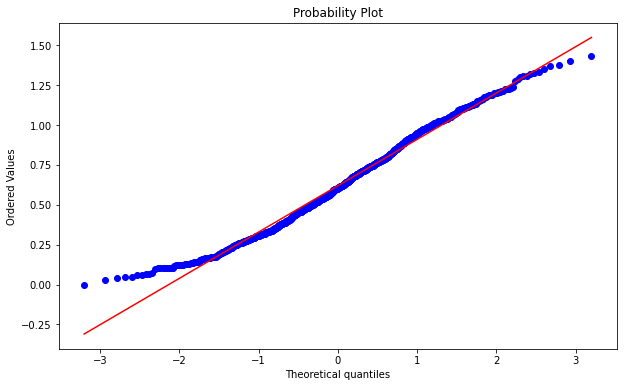

In [42]:
#hey that histogram look more normal! let's take a look at the QQ-plot
f, ax = plt.subplots(figsize=(10,6))
res = stats.probplot(log_shift_skew, plot=ax)

In [ ]:
#hmmmm still isn't completely normal - looks like we should take that into account when making any predictions